# Introduction à l'IA

Vous venez d'assister à ma présentation et vous êtes maintenant des pros de l'IA. Afin que vous puissiez appréhender son utilisation dans l'entreprise, je vous laisse vous entraîner sur le code associé aux figures de la présentation. Je vous ai laissé des notes à côté des lignes de code pour vous indiquer ce qu'elles font et ce que vous pouvez modifier, ajouter ou retirer. 

## Arbre de décision (Decision Tree)

Pour cette partie, j'avais choisi comme exemple la détermination d'une personne à partir de sa taille, son poids et sa pointure.

### Importation des bibliothèques

Pour effectuer un arbre de décision et prédire les résultats, nous aurons besoin des bibliothèques suivantes :

In [17]:
import pandas as pd
from sklearn import tree
import matplotlib.pyplot as plt
from sklearn.tree import plot_tree

### Création du jeu de données

In [27]:
clf = tree.DecisionTreeClassifier()

# Ici vous pouvez ajouter ou retirer des personnes au dataset. 
# Chaque sous-tableau de X contient [height, weight, shoe_size]
# Y détermine le genre de la personne respectivement à l'ordre des infos de X
# Si vous ajoutez ou retirez des personnes, assurez vous de conserver la forme du tableau

X = [[181, 80, 44], [177, 70, 43], [160, 60, 38], [154, 54, 37], [166, 65, 40],
     [190, 90, 47], [175, 64, 39],
     [177, 70, 40], [159, 55, 37], [171, 75, 42], [181, 85, 43]]

Y = ['male', 'male', 'female', 'female', 'male', 'male', 'female', 'female',
     'female', 'male', 'male']

clf = clf.fit(X, Y)

### Création de l'arbre de décision

⚠️Ne touchez pas au code ci-dessous⚠️ \
Cet arbre est totalement automatisé et est ploté à partir des données du dataset de la section précédent.

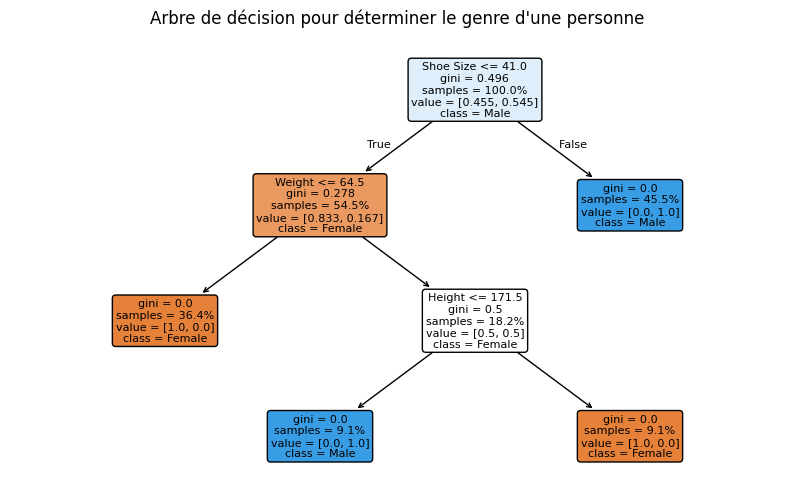

In [28]:
fig, ax = plt.subplots(figsize=(10, 6))
tree.plot_tree(clf, feature_names=["Height", "Weight", "Shoe Size"], 
               class_names=["Female", "Male"], filled=True, rounded=True, 
               #Dans value, la valeur de gauche est la proportion de femme et la valeur de droite est la proportion d'hommes
               fontsize=8, proportion=True, ax=ax)
plt.title("Arbre de décision pour déterminer le genre d'une personne")
plt.show()

### Prédiction des résultats

Je vous invite à modifier à votre guise les trois valeurs ci-dessous pour déterminer le genre de la personne en fonction de ses caractéristiques physiques. 

In [35]:
prediction = clf.predict([[173,68,40]]) #["Height", "Weight", "Shoe Size"]

print(prediction)

['female']


## Un autre exemple d'arbre de décision

Lors de la présentation, je vous ai aussi proposé un exemple plus concret faisant appel à une base de données .csv. L'objectif ici est de déterminer à partir de l'âge et du salaire estimé d'une personne si elle est susceptible d'acheter le produit d'une entreprise.

### Création de l'arbre de décision

⚠️Ne touchez pas au code ci-dessous⚠️ \
Cet arbre est totalement automatisé et est ploté à partir des données du dataset KNN.csv. \
Si vous souhaitez tester un autre fichier.csv, assurez-vous que les sélections de X et y correspondent à votre fichier.

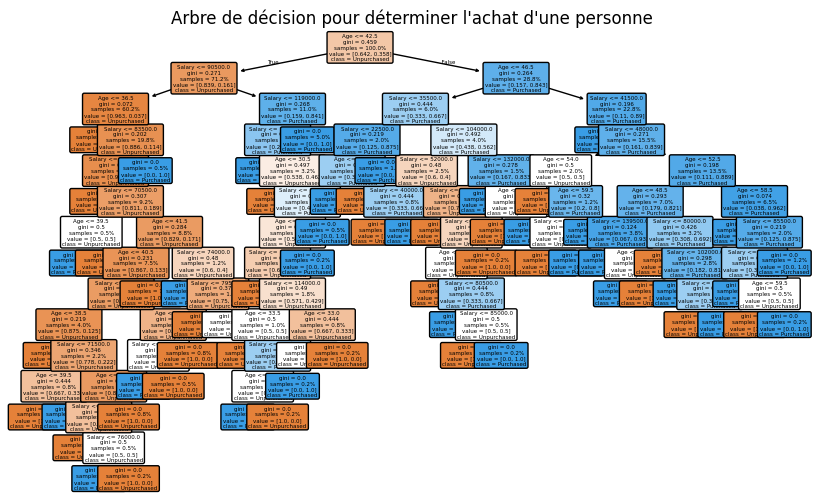

In [10]:
dataset = pd.read_csv('KNN.csv') # Charger et manipuler le dataset
X = dataset.iloc[:, 2:4].values  # Sélection de l'âge et du salaire
y = dataset.iloc[:, 4].values  # Colonne "purchased" (a acheté ou non)

clf = clf.fit(X, y)

fig, ax = plt.subplots(figsize=(10, 6))
tree.plot_tree(clf, feature_names=["Age", "Salary"], 
               class_names=["Unpurchased", "Purchased"], filled=True, rounded=True, 
               fontsize=4, proportion=True, ax=ax)
plt.title("Arbre de décision pour déterminer l'achat d'une personne")
plt.show()

### Prédiction des résultats

Nous vous invitons à modifier à votre guise les deux valeurs ci-dessous pour déterminer si la personne achète en fonction de son âge et de son salaire.\
0 = n'achète pas \
1 = achète

In [11]:
prediction = clf.predict([[60,10000]]) #["Age", "Salary"]

print(prediction)

[1]


## Classification automatique (Statistical Classification) avec la méthode des KNN (K-nearest neighbors)

Pour cette partie, j'avais décidé de vous parler des statistiques d'une entreprise pour savoir si une personne était suscpetible d'acheter un produit en fonction de son âge et de son salaire (exemple précédent). Ce code consiste à connaître la proportion d'erreur de jugement sur les intentions d'achat d'une personne. \
⚠️Ne touchez pas au code ci-dessous⚠️. Il a été spécialement conçu avec le fichier KNN.csv. 

### Importation des bibliothèques

In [12]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plot
from matplotlib.colors import ListedColormap
from sklearn.metrics import confusion_matrix
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier

pandas = charger et manipuler le dataset \
numpy = pour les calculs numériques \
matplotlib = pour la visualisation \
confusion_matrix = pour évaluer la performance du modèle \
train_test_split = pour séparer les données en ensemble d'entraînement et de test \
StandardScaler = pour normaliser les valeurs (mettre les valeurs sur la même échelle \
KNeighborsClassifier = implementation de l'algorithe KNN

### Mise en forme des données

In [13]:
# Séparation des données en train/test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.5, random_state=0)

# Normalisation des variables (important pour KNN car permet de lisser les échelles)
sc_x = StandardScaler()
X_train = sc_x.fit_transform(X_train)
X_test = sc_x.transform(X_test)  # Correction : on utilise transform() et non fit_transform()

# Création et entraînement du modèle KNN
classifier = KNeighborsClassifier(n_neighbors=5, metric='minkowski', p=2)
classifier.fit(X_train, y_train)

KNeighborsClassifier()

### Visualisation des résultats

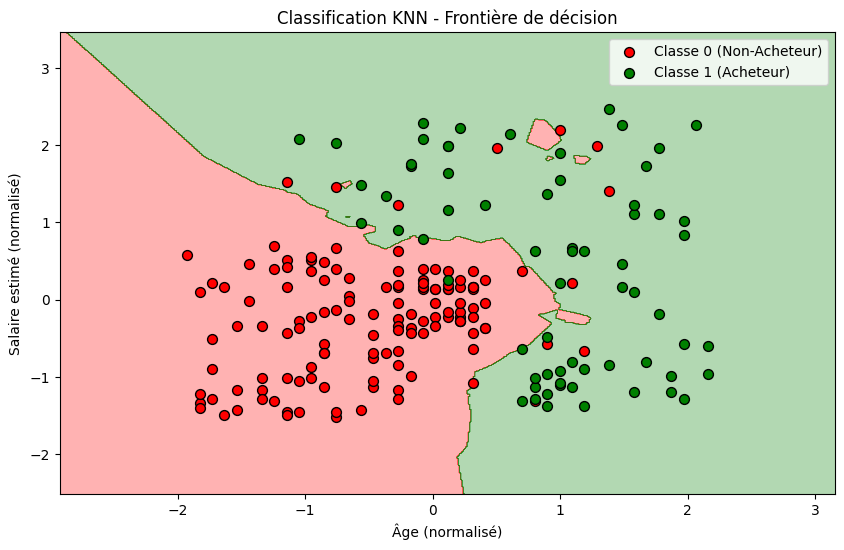

In [14]:
X_set, y_set = X_train, y_train  # On visualise avec les données d'entraînement
X1, X2 = np.meshgrid(np.arange(X_set[:, 0].min() - 1, X_set[:, 0].max() + 1, 0.01),
                     np.arange(X_set[:, 1].min() - 1, X_set[:, 1].max() + 1, 0.01))

plt.figure(figsize=(10, 6))
plt.contourf(X1, X2, classifier.predict(np.array([X1.ravel(), X2.ravel()]).T).reshape(X1.shape),
             alpha=0.3, cmap=ListedColormap(('red', 'green')))

plt.scatter(X_set[y_set == 0, 0], X_set[y_set == 0, 1], 
            color='red', edgecolor='k', s=50, label='Classe 0 (Non-Acheteur)')
plt.scatter(X_set[y_set == 1, 0], X_set[y_set == 1, 1], 
            color='green', edgecolor='k', s=50, label='Classe 1 (Acheteur)')

plt.xlabel('Âge (normalisé)')
plt.ylabel('Salaire estimé (normalisé)')
plt.title('Classification KNN - Frontière de décision')
plt.legend(['Classe 0 (Non-Acheteur)', 'Classe 1 (Acheteur)'])
plt.show()

### Evaluation des résultats

In [15]:
y_pred = classifier.predict(X_test)
cm = confusion_matrix(y_test, y_pred)
print("Matrice de confusion :\n", cm)

Matrice de confusion :
 [[112  11]
 [ 12  65]]


Fonctionnement de la matrice de confusion :

[[TN FP] \
[FN TP]]

TN = True Negative : Nombre de personnes n'ayant pas acheté, et le modèle a prédit qu'elles n'achèteraient pas.\
FP = False Positive : Nombre de personnes n’ayant pas acheté, mais le modèle a prédit qu’elles achèteraient → Erreur !\
FN = False Negative : Nombre de personnes ayant acheté, mais le modèle a prédit qu'elles n'achèteraient pas → Erreur critique !\
TP = True Positive : Nombre de personnes ayant acheté, et le modèle a prédit qu'elles achèteraient.